**Prayer (Salat) Posture Classification and Analysis Using Convolutional Neural Network (CNN), ALEXNET and GOOGLENET Deep Learning Neural Network**

By: 

**Salman Ahmed Khan (19K-1043)
Sadeem Sattar (19K-1102)
Abdullah Tilal Khan (19K-1103)** 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# Images Dataset Path
posture_types = os.listdir('drive/MyDrive/Salat_Dataset')

In [2]:
posture = []
DIR = 'drive/MyDrive/Salat_Dataset'
for item in posture_types:
  all_posture = os.listdir(DIR + '/' + item)
  
  # Fetched folders
  for p in all_posture:
    posture.append((item, str(DIR + '/' + item) + '/' + p))

In [4]:
# Build dataframe
posture_df = pd.DataFrame(data=posture, columns=['posture type', 'image'])
print(posture_df.head())
print("Total number of images in the dataset: ", len(posture_df))

  posture type                                           image
0         qiam   drive/MyDrive/Salat_Dataset/qiam/qiam(12).jpg
1         qiam  drive/MyDrive/Salat_Dataset/qiam/qiam(240).jpg
2         qiam   drive/MyDrive/Salat_Dataset/qiam/qiam(37).jpg
3         qiam  drive/MyDrive/Salat_Dataset/qiam/qiam(216).jpg
4         qiam   drive/MyDrive/Salat_Dataset/qiam/qiam(84).jpg
Total number of images in the dataset:  653


In [5]:
import cv2
path = DIR + '/'

# Resize the images to 224x224
image_size = 224

images = []
labels = []

for i in posture_types:
  data_path = path + str(i)
  filenmes = [i for i in os.listdir(data_path)]

  for f in filenmes:
    
    img = cv2.imread(data_path + '/' + f)
    try:
      img = cv2.resize(img, (image_size, image_size))
      images.append(img)
      labels.append(i)
    except:
        break

images = np.array(images)

# Normalization
images = images.astype('float32') / 255.0
print(images.shape)

(653, 224, 224, 3)


In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

y = posture_df['posture type'].values

print(y.shape)

# Label Encoding on Labels
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)

# Reshape
y = y.reshape(-1,1)

# One-Hot-Encoder on Labels
onehotencoder = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = onehotencoder.fit_transform(y)
print(Y)
print(images.shape)

(653,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
(653, 224, 224, 3)


Train and Test DataSet

In [7]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle images and labels
images, Y = shuffle(images, Y, random_state=1)

# Generate train and test dataset 70-30 ratio
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.3, random_state=415)

#inspect the shape of the training and testing
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(457, 224, 224, 3)
(457, 3)
(196, 224, 224, 3)
(196, 3)


In [8]:
import tensorflow as tf

train_x = np.array(train_x).reshape(-1, 224, 224, 3)

test_x = np.array(test_x).reshape(-1, 224, 224, 3)

**Convolutional Neural Network**

In [9]:
import tensorflow as tf

model_1 = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu', input_shape=(224,224,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #####################################
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #####################################
                                    tf.keras.layers.Flatten(),
                                    #####################################
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #####################################
                                    tf.keras.layers.Dense(10, activation = 'relu'),
                                    #####################################
                                    tf.keras.layers.Dense(3, activation = 'softmax')
                                  ])
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_1.compile(optimizer= opt, loss='categorical_crossentropy',metrics=['accuracy'])

Training Model

In [10]:
history_CNN = model_1.fit(x=train_x, y=train_y, batch_size=16, epochs=50,validation_split=0.1, shuffle=True)

Epoch 1/50
26/26 [==============================] - 93s 4s/step - loss: 0.9313 - accuracy: 0.5547 - val_loss: 0.7042 - val_accuracy: 0.7826
Epoch 2/50
26/26 [==============================] - 91s 4s/step - loss: 0.6290 - accuracy: 0.7470 - val_loss: 0.4766 - val_accuracy: 0.8043
Epoch 3/50
26/26 [==============================] - 91s 4s/step - loss: 0.4794 - accuracy: 0.7810 - val_loss: 0.4208 - val_accuracy: 0.8478
Epoch 4/50
26/26 [==============================] - 92s 4s/step - loss: 0.3063 - accuracy: 0.9002 - val_loss: 0.3819 - val_accuracy: 0.8478
Epoch 5/50
26/26 [==============================] - 92s 4s/step - loss: 0.1341 - accuracy: 0.9659 - val_loss: 0.2326 - val_accuracy: 0.9130
Epoch 6/50
26/26 [==============================] - 92s 4s/step - loss: 0.0594 - accuracy: 0.9854 - val_loss: 0.3883 - val_accuracy: 0.8913
Epoch 7/50
26/26 [==============================] - 92s 4s/step - loss: 0.0687 - accuracy: 0.9708 - val_loss: 0.3687 - val_accuracy: 0.8913
Epoch 8/50
26/26 [==

Saving Model CNN

In [12]:
model_1.save('drive/MyDrive/cnn_model.h5') 

Reteriving Model CNN

In [ ]:
import tensorflow as tf
CNN_Model_Load = tf.keras.models.load_model('drive/MyDrive/cnn_model.h5')
CNN_Model_Load.summary()

Evaluating Model

In [13]:
# Evaluate the model on the test data using `evaluate`
test_x = np.array(test_x).reshape(-1, 224, 224, 3)
print(test_x.shape, test_y.shape)
print("CNN_Evaluate on test data")

# CNN Model
results = model_1.evaluate(test_x, test_y)

print("test loss: ", results[0])
print("test accuracy: ", results[1])

(196, 224, 224, 3) (196, 3)
CNN_Evaluate on test data
7/7 [==============================] - 10s 1s/step - loss: 0.5562 - accuracy: 0.9082
test loss:  0.5562285780906677
test accuracy:  0.9081632494926453


**ALEXNET NEURAL NETWORK**

In [16]:
import tensorflow as tf

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4096, activation='relu'),
    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(4096, activation='relu'),
    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_2.compile(optimizer= opt, loss='categorical_crossentropy',metrics=['accuracy'])

Training Model

In [17]:
history_ALEXNET = model_2.fit(x=train_x, y=train_y, batch_size=16, epochs=50,validation_split=0.1, shuffle=True)

Epoch 1/50
26/26 [==============================] - 60s 2s/step - loss: 3.4469 - accuracy: 0.5280 - val_loss: 1.0875 - val_accuracy: 0.4130
Epoch 2/50
26/26 [==============================] - 64s 2s/step - loss: 1.2407 - accuracy: 0.7348 - val_loss: 1.2489 - val_accuracy: 0.2174
Epoch 3/50
26/26 [==============================] - 70s 3s/step - loss: 0.9680 - accuracy: 0.7835 - val_loss: 1.2626 - val_accuracy: 0.4130
Epoch 4/50
26/26 [==============================] - 66s 3s/step - loss: 0.6721 - accuracy: 0.8370 - val_loss: 1.5782 - val_accuracy: 0.4130
Epoch 5/50
26/26 [==============================] - 59s 2s/step - loss: 0.6397 - accuracy: 0.8613 - val_loss: 2.0953 - val_accuracy: 0.4130
Epoch 6/50
26/26 [==============================] - 69s 3s/step - loss: 0.3305 - accuracy: 0.9100 - val_loss: 3.0024 - val_accuracy: 0.2174
Epoch 7/50
26/26 [==============================] - 71s 3s/step - loss: 0.6605 - accuracy: 0.8759 - val_loss: 2.3360 - val_accuracy: 0.3913
Epoch 8/50
26/26 [==

Saving Model ALEXNET

In [18]:
model_2.save('drive/MyDrive/alexnet_model.h5')

Reteriving Model ALEXNET

In [ ]:
import tensorflow as tf
ALEXNET_Model_Load = tf.keras.models.load_model('drive/MyDrive/alexnet_model.h5')
ALEXNET_Model_Load.summary()

Evaluating Model ALEXNET

In [19]:
# Evaluate the model on the test data using `evaluate`
test_x = np.array(test_x).reshape(-1, 224, 224, 3)
print(test_x.shape, test_y.shape)
print("ALEXNET_Evaluate on test data")

# ALEXNET Model
results = model_2.evaluate(test_x, test_y)

print("test loss: ", results[0])
print("test accuracy: ", results[1])

(196, 224, 224, 3) (196, 3)
ALEXNET_Evaluate on test data
7/7 [==============================] - 7s 1s/step - loss: 5.9051 - accuracy: 0.8265
test loss:  5.905065536499023
test accuracy:  0.8265306353569031


**GOOGLENET NEURAL NETWORK**

In [20]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

Inception Block

In [21]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

GOOGLENET ALGORITHM

In [22]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(1024, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(3, activation = 'softmax')(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(1024, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(3, activation = 'softmax')(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(3, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

Model Compile

In [23]:
model_3 = GoogLeNet()

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_3.compile(optimizer= opt, loss='categorical_crossentropy',metrics=['accuracy'])

Training Model GOOGLENET

In [24]:
history_GOOGLENET = model_3.fit(x=train_x, y=train_y, batch_size=16, epochs=50,validation_split=0.1, shuffle=True)

Epoch 1/50
26/26 [==============================] - 90s 3s/step - loss: 3.2353 - dense_16_loss: 1.0814 - dense_13_loss: 1.0755 - dense_15_loss: 1.0784 - dense_16_accuracy: 0.4453 - dense_13_accuracy: 0.4380 - dense_15_accuracy: 0.4428 - val_loss: 3.2928 - val_dense_16_loss: 1.1009 - val_dense_13_loss: 1.0927 - val_dense_15_loss: 1.0992 - val_dense_16_accuracy: 0.3696 - val_dense_13_accuracy: 0.3696 - val_dense_15_accuracy: 0.3696
Epoch 2/50
26/26 [==============================] - 81s 3s/step - loss: 3.2425 - dense_16_loss: 1.0859 - dense_13_loss: 1.0695 - dense_15_loss: 1.0870 - dense_16_accuracy: 0.4501 - dense_13_accuracy: 0.4599 - dense_15_accuracy: 0.4501 - val_loss: 3.2722 - val_dense_16_loss: 1.0937 - val_dense_13_loss: 1.0856 - val_dense_15_loss: 1.0929 - val_dense_16_accuracy: 0.3696 - val_dense_13_accuracy: 0.3696 - val_dense_15_accuracy: 0.3696
Epoch 3/50
26/26 [==============================] - 81s 3s/step - loss: 3.2180 - dense_16_loss: 1.0769 - dense_13_loss: 1.0660 - den

Saving Model GOOGLENET

In [25]:
model_3.save('drive/MyDrive/googlenet_model.h5') 

Reteriving the Model

In [ ]:
import tensorflow as tf
GOOGLENET_Model_Load = tf.keras.models.load_model('drive/MyDrive/googlenet_model.h5')
GOOGLENET_Model_Load.summary()

Evaluating Model GOOGLENET

In [31]:
# Evaluate the model on the test data using `evaluate`
test_x = np.array(test_x).reshape(-1, 224, 224, 3)
print(test_x.shape, test_y.shape)
print("GOOGLENET_Evaluate on test data")

# GOOGLENET Model
results = model_3.evaluate(test_x, test_y)

print("test loss: ", results[0])
print("test accuracy: ", results[1])

(196, 224, 224, 3) (196, 3)
GOOGLENET_Evaluate on test data
7/7 [==============================] - 8s 1s/step - loss: 1.5069 - dense_16_loss: 0.5355 - dense_13_loss: 0.4094 - dense_15_loss: 0.5619 - dense_16_accuracy: 0.8929 - dense_13_accuracy: 0.9031 - dense_15_accuracy: 0.9031
test loss:  1.5068894624710083
test accuracy:  0.5355218648910522


**Plotting The Graph**

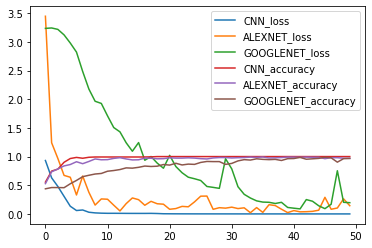

In [28]:
# Plotting Loss
plt.plot(history_CNN.history['loss'])
plt.plot(history_ALEXNET.history['loss'])
plt.plot(history_GOOGLENET.history['loss'])

# Plotting Accuracy
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_ALEXNET.history['accuracy'])
plt.plot(history_GOOGLENET.history['dense_13_accuracy'])

# Legend
plt.legend(['CNN_loss', 'ALEXNET_loss', 'GOOGLENET_loss', 'CNN_accuracy', 'ALEXNET_accuracy', 'GOOGLENET_accuracy'])


**PREDICTION**

In [ ]:
# CNN Prediction
CNN_pred = model_1.predict(test_x) 

CNN_pred = np.argmax(CNN_pred, axis = 1) 
label = np.argmax(test_y,axis = 1) 
print("CNN Model Prediction\n")
print(CNN_pred) 
print(label)

# ALEXNET Prediction
ALEXNET_pred = model_2.predict(test_x) 

ALEXNET_pred = np.argmax(ALEXNET_pred, axis = 1) 
label = np.argmax(test_y,axis = 1) 
print("\nALEXNET Model Prediction\n")
print(ALEXNET_pred) 
print(label)

# GOOGLENET Prediction
GOOGLENET_pred = model_3.predict(test_x) 

GOOGLENET_pred = np.argmax(GOOGLENET_pred, axis = 1) 
label = np.argmax(test_y,axis = 1) 
print("\nGOOGLENET Model Prediction\n")
print(GOOGLENET_pred) 
print(label)